In [1]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 16.2 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=69120e5250655a4b577afd8b5e6ec9a82d879542161b95bedc6aa0fd8b2196ed
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.5 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions

In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [3]:
from google.colab import files
uploaded = files.upload()

Saving survival_unemployment.csv to survival_unemployment.csv


In [4]:
# Loading the the survival un-employment data
survival_unemp = pd.read_csv("survival_unemployment.csv")

In [5]:
survival_unemp.head()


,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [6]:
survival_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spell    3343 non-null   int64  
 1   event    3343 non-null   int64  
 2   ui       3343 non-null   int64  
 3   logwage  3343 non-null   float64
 4   age      3343 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 130.7 KB


In [7]:
survival_unemp.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [8]:
survival_unemp

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22
...,...,...,...,...,...
3338,11,0,1,5.69373,41
3339,4,0,1,5.92959,27
3340,5,0,1,5.80513,30
3341,1,1,0,5.24175,29


In [9]:
survival_unemp["spell"].describe()

count    3343.000000
mean        6.247981
std         5.611271
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        28.000000
Name: spell, dtype: float64

In [10]:
# Spell is referring to time 
T = survival_unemp.spell
T


0        5
1       13
2       21
3        3
4        9
        ..
3338    11
3339     4
3340     5
3341     1
3342     8
Name: spell, Length: 3343, dtype: int64

In [11]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

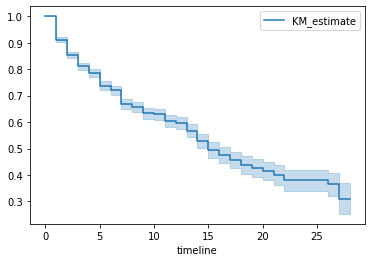

In [12]:
# Fitting KaplanMeierFitter model on Time and Events for death 
kmf.fit(T,event_observed=survival_unemp.event)
# Time-line estimations plot 
kmf.plot()

In [13]:
# Over Multiple groups 
# For each group, here group is ui
survival_unemp.ui.value_counts()

1    1848
0    1495
Name: ui, dtype: int64

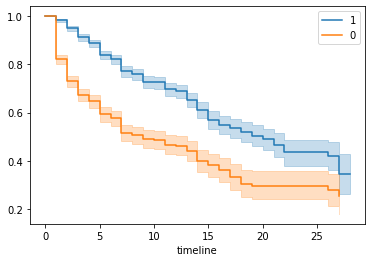

In [14]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
ax = kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[survival_unemp.ui==0], survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot(ax=ax)
